# LINEAR REGRESSION
<B>Objective:</B> To gets hands on experience on multiple linear regression. 
* Cost Function for regression
* Gradient Descent, Learning rates
* Feature Normalization
* Iterative method vs Direct Method for regression
* Using scikit-learn library for regression
* How to work with categorical variables / one hot encoding

<B>Problem:</B> We will solve two set of problems 
1. Predicting house price
2. Predicting weather station maintenence request counts

# INTRODUCTION
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. Is used to predict values within a continuous range. (e.g. sales, price) 

<b>Simple Regression:</b> Simple linear regression uses traditional slope-intercept form, where $m$ and $b$ are the variables our algorithm will try to “learn” to produce the most accurate predictions. $x$ represents our input data and $y$ represents our prediction.

$$\hat {y}=\theta_{1}x+\theta_{0}$$

In order to compute the values of $m$ and $b$ we need to minimize a cost function. In the case of Linear Regression it is given by

$$J(\theta) = \frac{1}{2m}\sum_{i=i}^{m}(\hat {y}_{i}-y_{i})^{2}$$

In multivariate regression we seek a set of parameters 

$$\textbf{$\Theta$} = [\theta_{0} \quad \theta_{1} \quad \cdots \quad \theta_{i} \quad \cdots \quad \theta_{m}]^{T}$$
               
which minimizes the the cost function:
Hypothesis 
$\textbf{H}=\textbf{X $\Theta$}$

Cost function is

$$\textbf{J($\Theta$)}=\frac{1}{2m}(\textbf{X$\Theta$} -\textbf{Y})^{T}(\textbf{X$\Theta$} -\textbf{Y})$$

The advantages of Linear Regression are that they computationally efficient, simple and easy to interpret. However, the algorithm fails to capture non-linear behavior.


In [306]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import datasets,linear_model

# Loading the data from a csv file
The columns represent the surface area, number of rooms and the price of the apartment. 

In [307]:
data = np.loadtxt('../data/Housing/housing_data.csv', delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y)

# Data Exploration
Plot the data and have a look
Note the large difference in the scale of "number of room variables" and "surface area". 
* "Number of room" has a range [1.0,5.0]
* "Surface area" has a range [500,4500]

This causes problems during the cost minimization step (gradient descent).

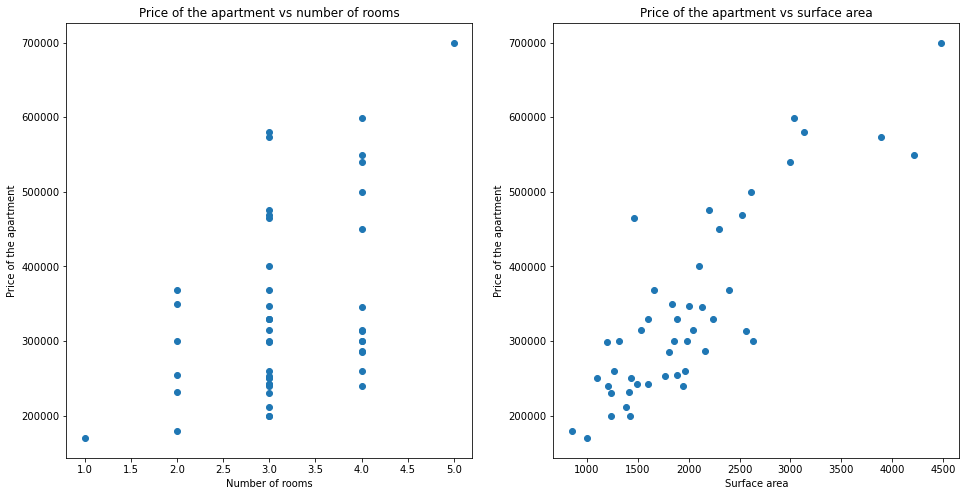

In [308]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.scatter(X[:,1],y)
plt.xlabel("Number of rooms")
plt.ylabel("Price of the apartment")
plt.title("Price of the apartment vs number of rooms")
plt.subplot(122)
plt.scatter(X[:,0],y)
plt.xlabel("Surface area")
plt.ylabel("Price of the apartment")
plt.title("Price of the apartment vs surface area")
plt.show()

# Feature normalization. 
The input feature vectors are normalized so that they have comparable scales.Here we do so by subtracting the mean and dividing by the standard deviation.

In [309]:
# Normalize features
def featureNormalize(X):
    X_norm = X.copy()
    mu    = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    for i in range(X.shape[1]):
        mu[:,i] = np.mean(X[:,i])
        sigma[:,i] = np.std(X[:,i])
        X_norm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
    return X_norm, mu, sigma

In [310]:
X_norm, mu, sigma = featureNormalize(X)

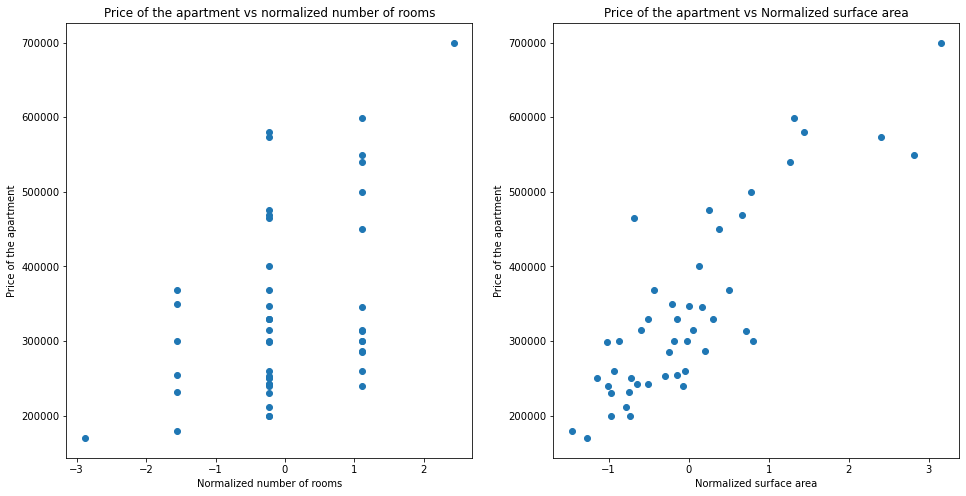

In [311]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.scatter(X_norm[:,1],y)
plt.xlabel("Normalized number of rooms")
plt.ylabel("Price of the apartment")
plt.title("Price of the apartment vs normalized number of rooms")
plt.subplot(122)
plt.scatter(X_norm[:,0],y)
plt.xlabel("Normalized surface area")
plt.ylabel("Price of the apartment")
plt.title("Price of the apartment vs Normalized surface area")
plt.show()

# Bias Term
We simply add a column vector of 1.

In [312]:
X_padded = np.column_stack((np.ones((m,1)), X_norm))

# Cost Function involving multiple variables
$$\textbf{J($\Theta$)}=\frac{1}{2m}(\textbf{X$\Theta$} -\textbf{Y})^{T}(\textbf{X$\Theta$} -\textbf{Y})$$

In [313]:
def computeCost(X,y,theta): 
    m=len(y)
    Cost=0.0;
    y=y.reshape(-1,1)
    Cost=1.0/2.0/m*(np.dot((X.dot(theta)-y).T,(X.dot(theta)-y))) 
    return Cost;

In [314]:
def gradientDescent(X, y, alpha, num_iters):
    m,n = X.shape
    theta = np.zeros((X.shape[1],1))
    Cost_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))    
        Cost_history[i] = computeCost(X, y, theta)
    return theta, Cost_history

In [315]:
def SolveGradientDescent(X,y,alpha, num_iters):
    m,n=X.shape
    theta, Loss_history = gradientDescent(X, y, alpha, num_iters)
    plt.plot(range(Loss_history.size), Loss_history, "-b", linewidth=2 )
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.show(block=False)
    theta.shape
    return theta

# Evolution of the cost function
Try solving the same problem but without feature normalization and convince yourself the importance of the step.

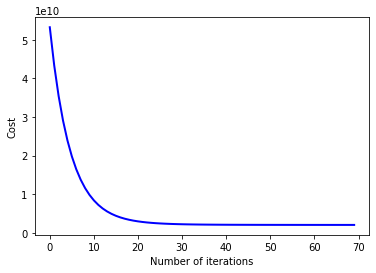

Theta computed from gradient descent:  [[340199.36423635 106961.59217624  -4092.86897639]]


In [316]:

theta_GD=SolveGradientDescent(X=X_padded,y=y,alpha=0.1,num_iters=70)
print('Theta computed from gradient descent: ',theta_GD.T)

# Make predictions using the trained model
Remember that the input features were normalized so we need to do the same with the new input features on which we want to make make predictions.

In [317]:
house_norm_padded = np.array([1, (1650-mu[0,0])/sigma[0,0], (3-mu[0,1])/sigma[0,1]])
price_GD = np.array(house_norm_padded).dot(theta_GD)
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):", price_GD)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): [293415.1732852]


# Solution using Normal Equation
Generally for very large problems due to memory requirements gradient descent algorithm is used for minimization but since here we are working with relatively small dataset with smaller number of feature vectors $X$, we have used direct method for finiding the minima. This involves invoking the closed-form solution to linear regression. Convince yourself with a little calculation that:

$$\mathbf{\Theta=(X^{T}X)^{-1}X^{T}Y}$$

In [318]:
# Solve using direct method
def normalEqn(X, y):  
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    return theta

In [319]:
theta_Normal = normalEqn(X_padded, y)
print("Theta calculated by Normal Equation ",theta_Normal)
price_Normal = np.array(house_norm_padded).dot(theta_Normal)
print("Predicted price of a 1650 sq-ft, 3 br house (using normal equation):", price_Normal)

Theta calculated by Normal Equation  [340412.65957447 109447.79646964  -6578.35485416]
Predicted price of a 1650 sq-ft, 3 br house (using normal equation): 293081.4643348961


# Regression using scikit-learn library in two lines

In [320]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_padded,y)
print("Theta calculated by SK-learn regression ",lr.coef_)
print("Predicted price ",lr.predict(house_norm_padded.reshape(1,-1)))

Theta calculated by SK-learn regression  [     0.         109447.79646964  -6578.35485416]
Predicted price  [293081.4643349]


# Example 2

Data Description
    
* date : yyyy-mm-dd format
* calendar_code : 0 or 1 (a code describing certain calendar events)
* request_count : an integer (the number of support requests received on that date)
* site_count : an integer (the number of sites operating on that date)
* max_temp : a float (max temperature for that day in degrees Celsius)
* min_temp : a float (min temperature for that day in degrees Celsius)
* precipitation : a float (millimeters of precipitation on that date)
* events : a string (description of weather events on that date)

Our aim is to predict the request_count when the other paeameters are given.

In [321]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
#ALso remember to parse the date column. This will be helpful in the next step
training_data=pd.read_csv('../data/Met/Met_train.csv',sep=',',parse_dates=['date'])
training_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog


# Data Exploration

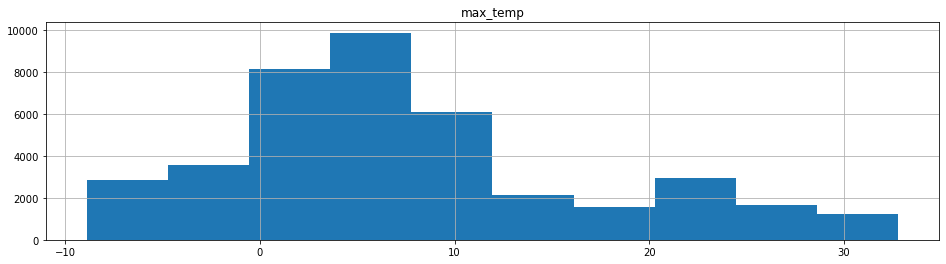

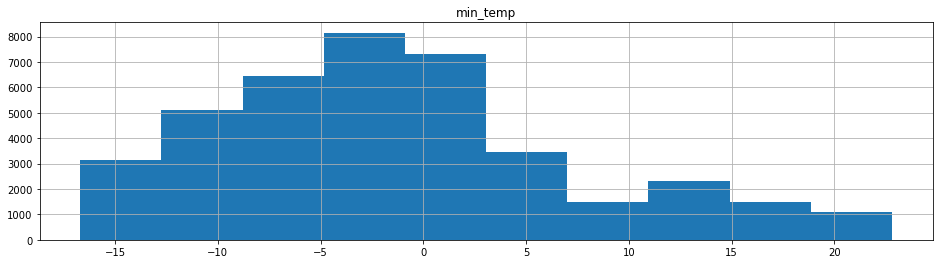

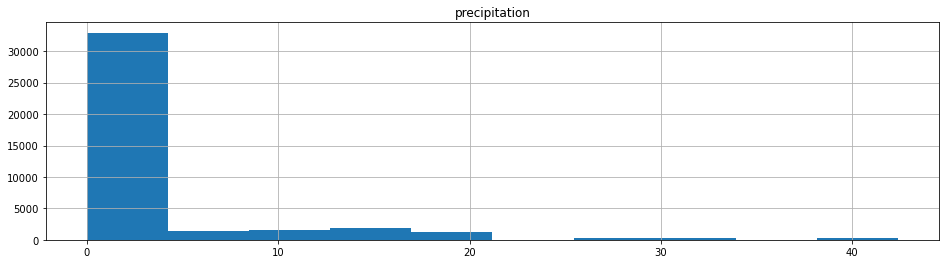

In [323]:
training_data.hist('max_temp',weights=training_data['request_count'],figsize=(16,4))
training_data.hist('min_temp',weights=training_data['request_count'],figsize=(16,4))
training_data.hist('precipitation',weights=training_data['request_count'],figsize=(16,4))
plt.show()


From the above histograms we see that most of the request comes when 
1. maximum temperature is below 10C 
2. min temperature is below 2C 
3. When there is zero precipitation

We use violin plot for dependence on the categorical variables (https://blog.modeanalytics.com/violin-plot-examples/)

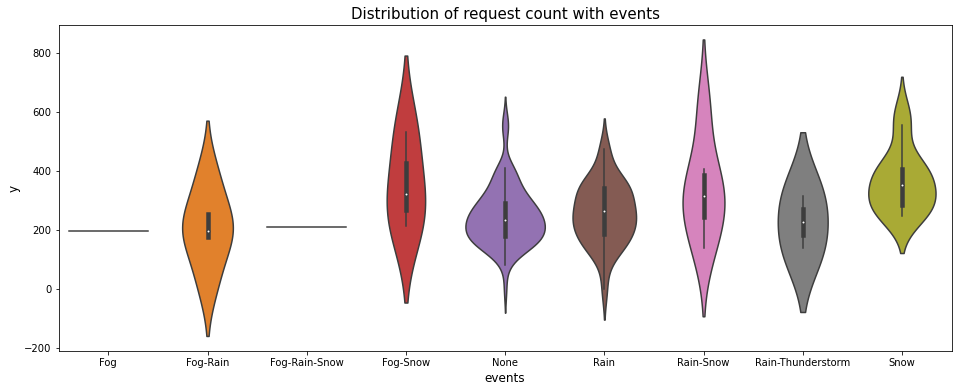

In [324]:
var_name = "events"
col_order = np.sort(training_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='request_count', data=training_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

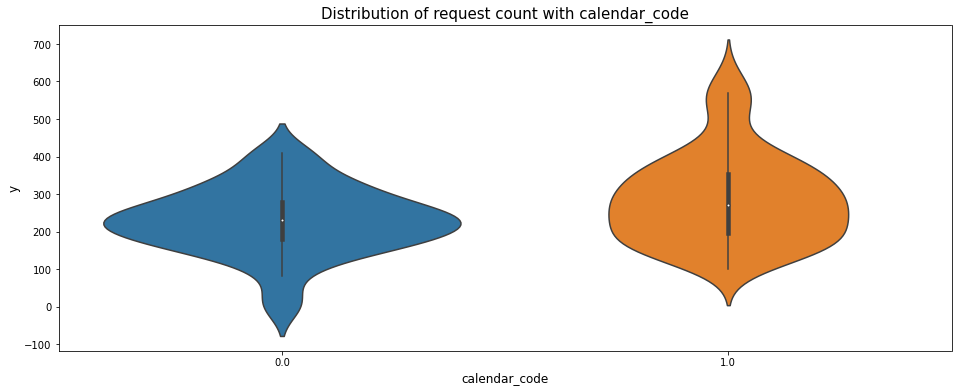

In [325]:
var_name = "calendar_code"
col_order = np.sort(training_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='request_count', data=training_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

In [326]:
training_data['day_of_week'] = training_data['date'].dt.dayofweek
training_data['week_day'] = training_data['date'].dt.weekday_name
training_data.head()

AttributeError: 'DatetimeProperties' object has no attribute 'weekday_name'

In [301]:
var_name = "week_day"
col_order = np.sort(training_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='request_count', data=training_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

KeyError: 'week_day'

# Dealing with categorical variables
In most of the machine learning algorithms barringa a few (ex. Decision Tree) we need numerical values for the input features. In the current data events are categorical variable which should be converted into a unique numerical identifiers. This will result in an additional column "events_code"

In [302]:
training_data['events_code'] = pd.Categorical(training_data["events"]).codes
training_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events,day_of_week,events_code
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain,0,5
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm,1,7
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None,2,4
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None,3,4
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog,4,0


Since request count is the target variable, we store it separately as "y"

In [303]:
y=training_data["request_count"]

Drop the redundant columns now "date","events","request_count"

In [305]:
training_data = training_data.drop(["date","events","request_count"],axis=1)
training_data.head()

,calendar_code,site_count,max_temp,min_temp,precipitation,day_of_week,events_code
0,0.0,6,30.6,22.8,0.0,0,5
1,1.0,7,32.8,22.8,15.5,1,7
2,1.0,7,29.4,18.3,0.0,2,4
3,1.0,7,29.4,17.2,0.0,3,4
4,1.0,7,30.6,21.7,0.0,4,0


# One-Hot-Encoding
The numerical values of day_of_week, events_code and calender code do not signify anything so they need to be one-hot-encoded to be used as a feature input vector.

In [329]:

training_data= pd.get_dummies(training_data,columns=["calendar_code","events_code","day_of_week"],prefix=["calendar","event","week"])
training_data.head()

KeyError: "['events_code'] not in index"

Call the feature vectors X

In [154]:
X=training_data.values
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.plot(X[:,0],y[:],'r.')
plt.xlabel("No. of sites")
plt.ylabel("No. of requests")
plt.subplot(132)
plt.plot((X[:,1]+X[:,2])/2.0,y[:],'r.')
plt.xlabel("Mean temperature")
plt.ylabel("No. of requests")
plt.subplot(133)
plt.plot(X[:,3],y[:],'r.')
plt.xlabel("Precipitation")
plt.ylabel("No. of requests")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (152,) and (47,)

# Task 1: Feature Engineering
It appeats that the no of requests has some kind of a quadratic dependence on the mean temperature so in addition to max and min temperature we should construct a new feature $((minx+maxx)/2)^{2}$. Feature engineering is one way of brining in domain knowledge or experience into the analysis. Add a new feature vector to the X matrix

In [153]:
training_data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events,day_of_week
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain,0
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm,1
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None,2
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None,3
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog,4


# Splitting the data into training and test set
Generally we can always tune the hyperparameters so much that the model performs well on the data but it fails to generalize on the unseen data. To avoid this we split the available data into traing and test sets. We want somewhat similar performance on both the sets.

# Task 2: Split the data into training and test and call them
 X_train, X_test, y_train, y_test

# Task 3: Conduct a MLR on the dataset and report MSE both on the training and the test data 